In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: >

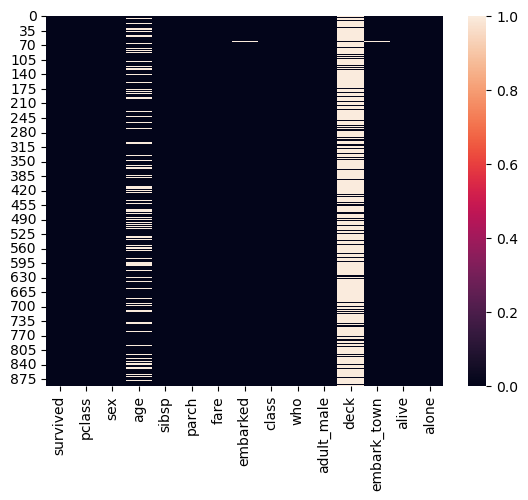

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.dropna().shape

(182, 15)

In [7]:
df.shape

(891, 15)

In [8]:
df.dropna(axis = 1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


/tmp/ipykernel_2405/3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

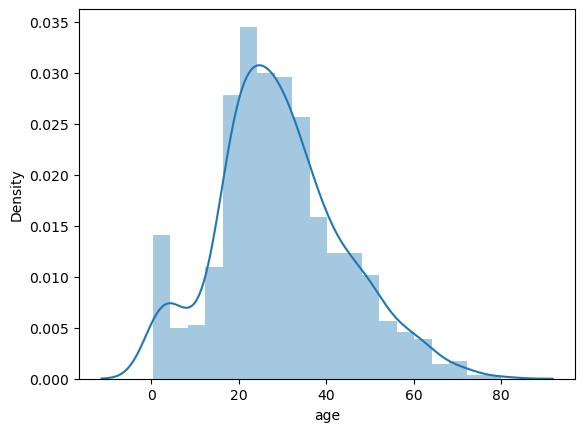

In [9]:
sns.distplot(df['age'])

In [10]:
df.age.isnull().sum()

177

In [11]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [12]:
df[['Age_mean' , 'age' ]] 

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [13]:
df['Age_median'] = df['age'].fillna(df['age'].median())

In [14]:
df[['Age_median' , 'Age_mean' , 'age' ]] 

,Age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [15]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [16]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df[df['age'].notna()]['embarked'].mode()[0]

'S'

In [18]:
mode = df[df['age'].notna()]['embarked'].mode()[0]

In [19]:
mode

'S'

In [20]:
df['embarked_mode'] = df['embarked'].fillna(mode)

In [21]:
df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [22]:
df['embarked_mode'].isnull().sum()

0

In [23]:
df['embarked'].isnull().sum()

2

# handle missing data

1. up sampling
2. down sampling

In [24]:
import numpy as np
import pandas as pd

In [25]:
np.random.seed(123)

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [26]:
n_class_0 ,n_class_1

(900, 100)

In [27]:
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'target' : [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'target' : [1] * n_class_1
})

In [28]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [29]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [30]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

# upsampling

In [31]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [32]:
df_minority.head()

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1


In [33]:
df_majority.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [34]:
from sklearn.utils import resample

In [35]:
df_minority_upsample = resample(df_minority,
                                replace=True,
                                n_samples = len(df_majority),
                                random_state  = 42
                               )

In [36]:
df_minority_upsample.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [37]:
df_minority_upsample.shape

(900, 3)

In [38]:
df_upsampled = pd.concat([df_majority,df_minority_upsample])

In [39]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

In [40]:
df_upsampled.shape

(1800, 3)

In [41]:
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'target' : [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'target' : [1] * n_class_1
})

# downsampled

In [42]:
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'target' : [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'target' : [1] * n_class_1
})

In [43]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [44]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [45]:
df_majority_downsample = resample(df_majority,
                                replace=False,
                                n_samples = len(df_minority),
                                random_state  = 42
                               )

In [46]:
df_majority_downsample.shape

(100, 3)

In [47]:
df_downsample = pd.concat([df_minority,df_majority_downsample])

In [48]:
df_downsample['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

# SMOTE

In [49]:
from sklearn.datasets import make_classification

In [50]:
x,y = make_classification(n_samples=1000,n_features=2,n_redundant = 0 , n_clusters_per_class=1,weights=[0.90],random_state=1)

In [51]:
df1 = pd.DataFrame(x,columns = ['f1' , 'f2'])
df2 = pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2], axis =1)
final_df.head()
                   

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [52]:
final_df['target'].value_counts()

0    894
1    106
Name: target, dtype: int64

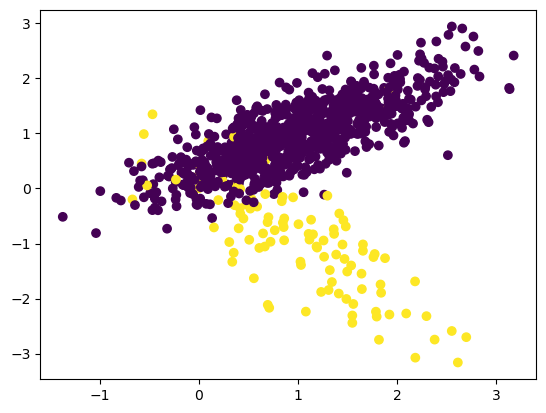

In [53]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'] , c = final_df['target'])

In [54]:
!pip install imblearn

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1' , 'f2']],final_df['target'])

In [57]:
 X.shape

(1788, 2)

In [58]:
y.shape

(1788,)

In [59]:
len(y[y == 0])

894

In [60]:
len(y[y ==1])

894

In [61]:
df1 = pd.DataFrame(X,columns = ['f1' , 'f2'])
df2 = pd.DataFrame(y,columns = ['target'])
oversample_df = pd.concat([df1,df2],axis=1)

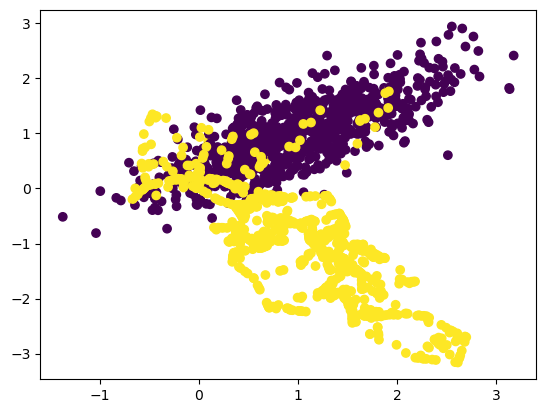

In [62]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c= oversample_df['target'])

# DATA INTERPOLATION

# 1. Linear Interpolation

In [63]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])

In [64]:
import matplotlib.pyplot as plt

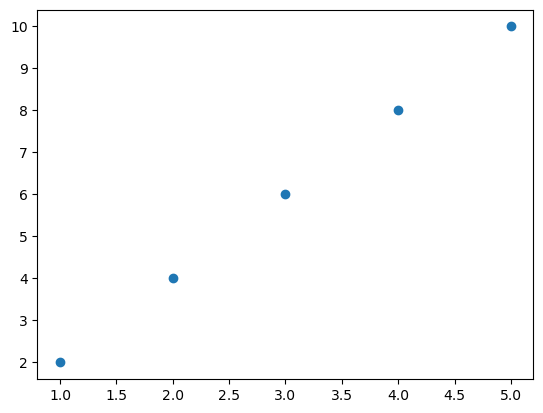

In [65]:
plt.scatter(x,y)

In [66]:
x_new = np.linspace(1,5,10)
y_interp = np.interp(x_new,x,y)
print(y_interp)

[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


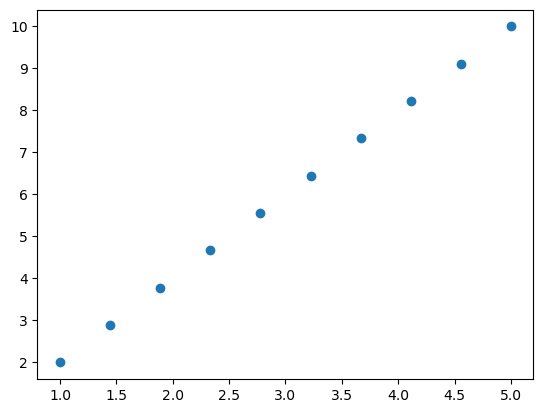

In [67]:
plt.scatter(x_new,y_interp)

# 2. Cubic Interpolation With Scipy

In [68]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

In [69]:
from scipy.interpolate import interp1d

In [70]:
f = interp1d(x,y,kind = 'cubic')

In [71]:
x_new = np.linspace(1 ,5, 10)
y_interp = f(x_new)
print(y_interp)

[  1.           3.01371742   6.739369    12.7037037   21.43347051
  33.45541838  49.2962963   69.48285322  94.54183813 125.        ]


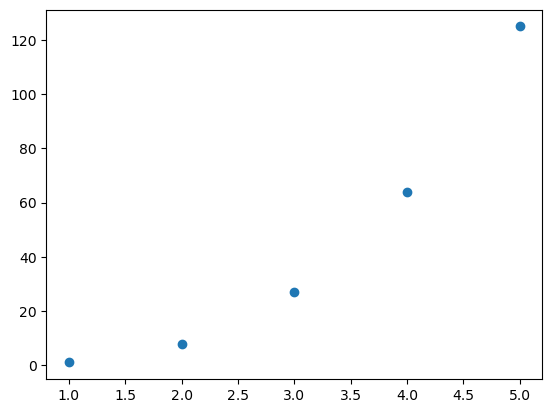

In [72]:
plt.scatter(x,y)

# Polynomial Interpolation 

In [73]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1,4,9,16,32])

In [74]:
P = np.polyfit(x,y,5)

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [75]:
x_new = np.linspace(1,5,10)
y_interp = np.polyval(P, x_new)


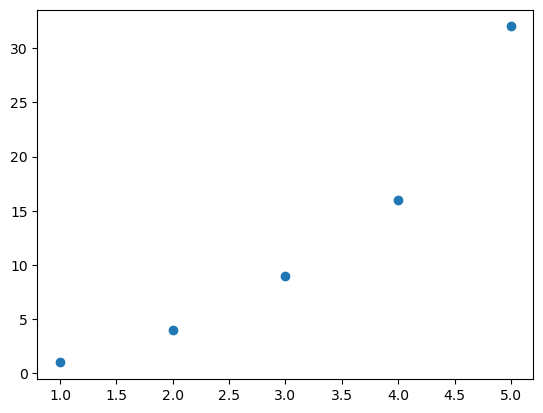

In [76]:
plt.scatter(x,y)

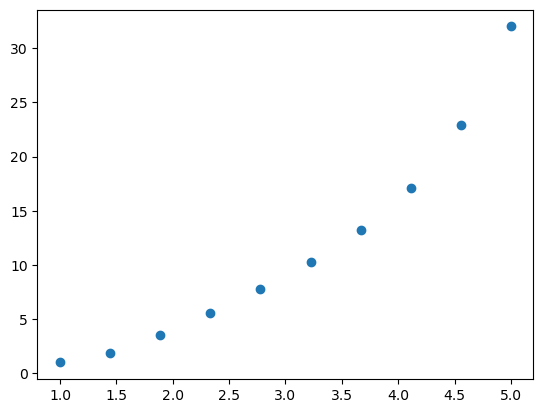

In [77]:
plt.scatter(x_new,y_interp)

# handling outliers


 ## 5 number summary
1. Minimum value
2. Q1 = 25 percentile
3. Median
4. Q3 - 75 percentile
5. Maximun

In [78]:
import numpy as np

In [79]:
lst_marks = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,1000,1100]

In [80]:
## [Lower Fence <----> Higher Fence]

Q1 = np.percentile(lst_marks , [25])
print(Q1)

[54.]


In [81]:
minimum,Q1,Q2,Q3,maximum = np.quantile(lst_marks , [0,0.25,0.50,0.75,1.0])

In [82]:
maximum

1100.0

In [83]:
IQR = Q3-Q1
print(IQR)

35.5


In [84]:
lower_fence = Q1-1.5*(IQR)
higher_fence = Q3 + 1.5*(IQR)

In [85]:
lower_fence,higher_fence

(0.75, 142.75)

In [86]:
outliers = [] 
for i in lst_marks:
    if i>=0.75 and i<=142.75:
        print("this is not an outlier")
    else :
        outliers.append(i)

this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier
this is not an outlier


In [87]:
outliers

[1000, 1100]

In [88]:
import seaborn as sns 

<AxesSubplot: >

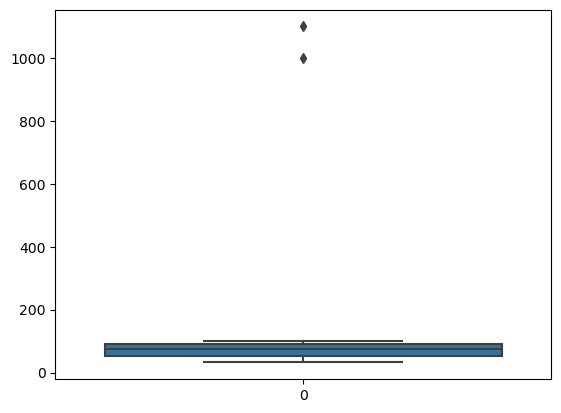

In [89]:
sns.boxplot(lst_marks)

In [90]:
lst_mark = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

<AxesSubplot: >

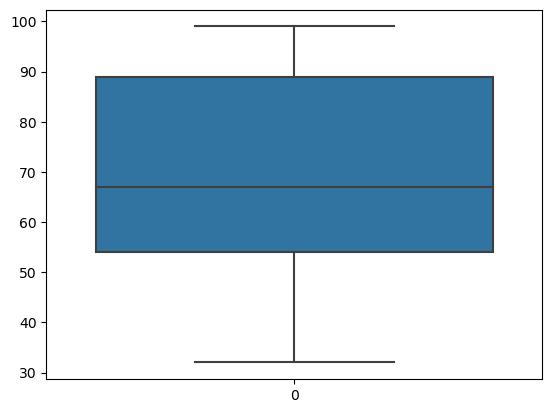

In [91]:
sns.boxplot(lst_mark)

# Feature Extraction

# 1.Feature Scaling
# 2.Feature Selection
# 3.Princile Component Analysis

# 1.Feature Scaling

# a) Standatrdization

In [8]:
import seaborn as sns

In [9]:
df = sns.load_dataset('tips')

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
total_bill = list(df['total_bill'])

<AxesSubplot: ylabel='Count'>

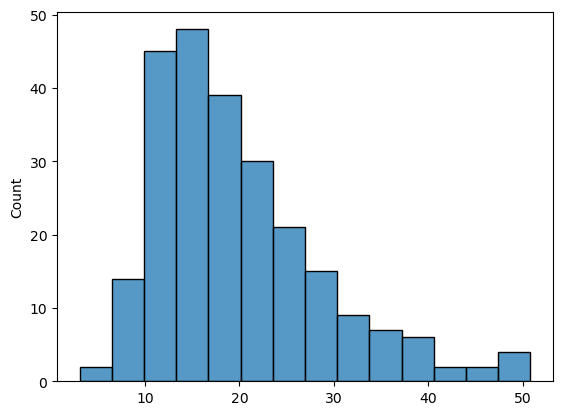

In [12]:
sns.histplot(total_bill)

In [13]:
import numpy as np
mean = np.mean(total_bill)
std = np.std(total_bill)

In [14]:
mean,std

(19.78594262295082, 8.884150577771132)

In [15]:
normalized_data = []
for i in total_bill:
    z_score = (i-mean)/std
    normalized_data.append(z_score)
    

print(normalized_data)

[-0.3147113050904943, -1.0632353132988692, 0.13777989987156145, 0.43831510316725475, 0.540744704290506, 0.6195367051545455, -1.2399545152367863, 0.7985071071171495, -0.5342033074974614, -0.5634689078183903, -1.0711145133852733, 1.7417599174609364, -0.49143050702841123, -0.15262490331304146, -0.557840907756673, 0.2019391005751361, -1.0643609133112126, -0.3935033059545337, -0.31696250511518104, 0.09725829942719795, -0.2100305039425557, 0.05673669898283484, -0.45203450659639155, 2.2100095225958003, 0.003833498402694168, -0.2224121040783337, -0.7221785095588127, -0.7987193103981653, 0.21544630072325727, -0.015301701807144186, -1.1521577142739994, -0.16162970341178864, -0.5319521074727743, 0.10176069947657193, -0.22578890411536368, 0.4810879036363046, -0.3912521059298469, -0.32146490516455467, -0.12335930299211233, 1.2926455125359115, -0.4216433062631192, -0.2618081045103532, -0.6580193088552376, -1.137524914113535, 1.1947183114620337, -0.16838330348584943, 0.2751031013774587, 1.41983831393

<AxesSubplot: ylabel='Count'>

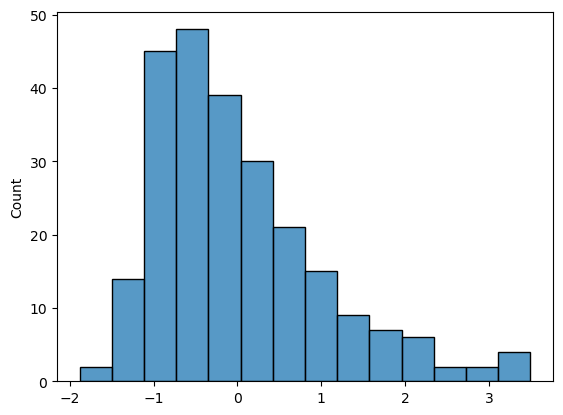

In [16]:
sns.histplot(normalized_data)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler

StandardScaler()

In [20]:
scaler.fit(df[['total_bill' , 'tip']])

StandardScaler()

In [105]:
import pandas as pd
pd.DataFrame(scaler.transform(df[['total_bill','tip']]),columns=['total_bill','tips'])

,total_bill,tips
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


# b) Normalization Min Max Scaling

In [106]:
import seaborn as sns

In [107]:
df = sns.load_dataset('taxis')

In [108]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
min_max = MinMaxScaler()

In [111]:
min_max.fit(df[['distance' , 'fare' , 'tip']])

MinMaxScaler()

In [112]:
min_max.transform(df[['distance' , 'fare' , 'tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [113]:
pd.DataFrame(min_max.fit_transform(df[['distance' , 'fare' , 'tip']]), columns = ['distance' , 'fare' , 'tip'])

,distance,fare,tip
0,0.043597,0.040268,0.064759
1,0.021526,0.026846,0.000000
2,0.037330,0.043624,0.071084
3,0.209809,0.174497,0.185241
4,0.058856,0.053691,0.033133
...,...,...,...
6428,0.020436,0.023490,0.031928
6429,0.510627,0.382550,0.000000
6430,0.112807,0.100671,0.000000
6431,0.030518,0.033557,0.000000


In [114]:
min_max.transform([[1,3,4]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.02724796, 0.01342282, 0.12048193]])

# 2. Unit Vector Feature Scaling

In [115]:
import seaborn as sns

In [116]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [117]:
from sklearn.preprocessing import normalize

In [118]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [120]:
normalize(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [122]:
pd.DataFrame(normalize(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]),columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


# 3. PCA

# ---------------------------------------------------

# DATA ENCODING

# 1. one hot encoding
# 2.Ordinal and Label Encoding
# 3.Target Guided Ordinal Encoding

In [1]:
#one hot encoding

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [30]:
df = pd.DataFrame({'color' : ['red' ,'blue','green','red','blue']})

In [3]:
df

,color
0,red
1,blue
2,green
3,red
4,blue


In [4]:
encoder = OneHotEncoder()

In [7]:
encoded = encoder.fit_transform(df[['color']])

In [10]:
import pandas as pd
encoded_df = pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out())

In [11]:
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [12]:
pd.concat([df,encoded_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,red,0.0,0.0,1.0
4,blue,1.0,0.0,0.0


In [13]:
import seaborn as sns

In [15]:
df = sns.load_dataset('tips')

In [16]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
encoder = OneHotEncoder()

In [21]:
encoded = encoder.fit_transform(df[['sex','smoker','day','time','size']])

In [22]:
encoded_df = pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out())

In [23]:
encoded_df

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
# label and ordinal encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [31]:
df = pd.DataFrame({'color' : ['red' , 'blue','green','green','red','blue']})

In [32]:
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [33]:
encoder = LabelEncoder()

In [34]:
encoder.fit_transform(df['color'])

array([2, 0, 1, 1, 2, 0])

In [41]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df = pd.DataFrame({'size' : ['small','medium','large','medium','small','large']})

In [42]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [45]:
encoder = OrdinalEncoder(categories=[['small','medium','large']])

In [47]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

# Target Guided Ordinal Encoding

# It is a technique used to encode categorical variable based on their relationship with target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

# In Target guided Ordinal Encoding, we reolace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category.This creates a monotonic realtionship between the categorical variable and the target variable,which can improve the predictive power of our model. 

In [48]:
import pandas as pd

df = pd.DataFrame({'city' : ['New York' , 'London' , 'Paris' , 'Tokoyo' , 'New York' , 'Paris'],
                   'price' : [200,150,300,250,180,320]
                  })

In [49]:
df.head()

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokoyo,250
4,New York,180


In [62]:
mean_price = df.groupby('city')['price'].mean()
mean_price

city
London      150.0
New York    190.0
Paris       310.0
Tokoyo      250.0
Name: price, dtype: float64

In [55]:
df['city_encoded'] = df['city'].map(mean_price)
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokoyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [63]:
import seaborn as sns
df = sns.load_dataset('tips')

In [65]:
mean_price = df.groupby('sex')['total_bill'].mean()
mean_price

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [66]:
df['sex_encoded'] = df['sex'].map(mean_price)
df

,total_bill,tip,sex,smoker,day,time,size,sex_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,18.056897
1,10.34,1.66,Male,No,Sun,Dinner,3,20.744076
2,21.01,3.50,Male,No,Sun,Dinner,3,20.744076
3,23.68,3.31,Male,No,Sun,Dinner,2,20.744076
4,24.59,3.61,Female,No,Sun,Dinner,4,18.056897
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.744076
240,27.18,2.00,Female,Yes,Sat,Dinner,2,18.056897
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.744076
242,17.82,1.75,Male,No,Sat,Dinner,2,20.744076


# Covariance And Correlation

In [1]:
import seaborn as sns

In [6]:
df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [7]:
df.cov()

/tmp/ipykernel_77/1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Year,Spending_USD,Life_Expectancy
Year,201.098848,2.571883e+04,41.915454
Spending_USD,25718.827373,4.817761e+06,4166.800912
Life_Expectancy,41.915454,4.166801e+03,10.733902


In [8]:
df.corr(method = 'pearson')

/tmp/ipykernel_77/2700349590.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


In [10]:
df.corr(method = 'spearman')

/tmp/ipykernel_77/875244283.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.931598,0.896117
Spending_USD,0.931598,1.000000,0.747407
Life_Expectancy,0.896117,0.747407,1.000000


In [17]:
df = sns.load_dataset('flights')

In [18]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [19]:
df.corr()

/tmp/ipykernel_77/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000
